Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

Number 1 - 2

In [2]:
data = np.loadtxt('sunspot.txt', delimiter='\t')

Number 3

In [3]:
years = data[:, 0]
sunspots = data[:, 1]

In [5]:
sunspots.shape

(315,)

Number 4

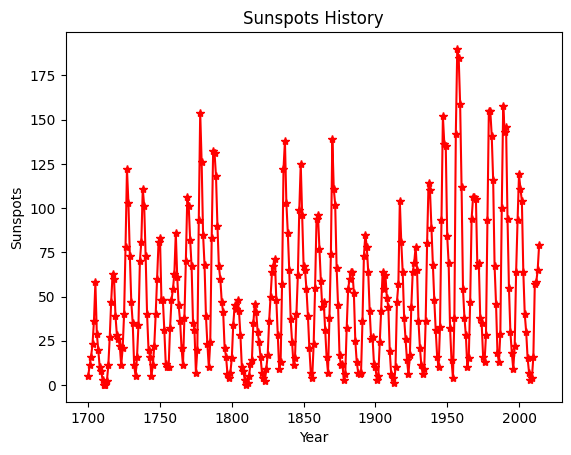

In [5]:
plt.plot(years, sunspots, 'r-*')
plt.xlabel('Year')
plt.ylabel('Sunspots')
plt.title('Sunspots History')
plt.show()

Number 5

In [6]:
n = 2
P = np.array([sunspots[i:i+n] for i in range(len(sunspots)-n)])
T = sunspots[n:]

In [7]:
print(f'T:\n{T.shape}')

T:
(313,)


Number 6

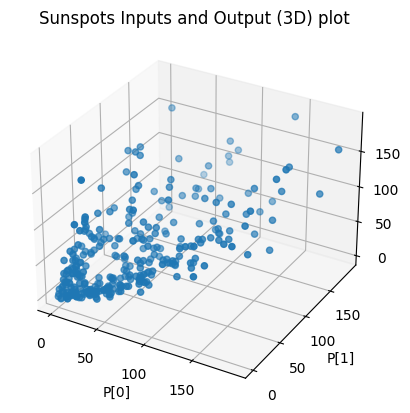

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(P[:,0], P[:,1], T)
ax.set_xlabel('P[0]')
ax.set_ylabel('P[1]')
ax.set_zlabel('T')
plt.title('Sunspots Inputs and Output (3D) plot')
plt.show()

Number 7

In [9]:
Pu = P[:200]
Tu = T[:200]

In [10]:
print(f'Tu:\n{Tu.shape}')

Tu:
(200,)


Number 8

In [11]:
Ir = 0.1
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_shape=[2])])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(Ir))
history = model.fit(Pu, Tu, epochs=1000, verbose=0)

In [12]:
print(f'Weights:\n{model.get_weights()}')

Weights:
[array([[-0.6778699],
       [ 1.3301487]], dtype=float32), array([13.211847], dtype=float32)]


Number 9

In [13]:
print('neuron weight coefficient values:')
print(model.get_weights())
w1 = model.get_weights()[0][0][0]
w2 = model.get_weights()[0][1][0]
b = model.get_weights()[1][0]
print(f'\nw1: {w1}')
print(f'w2: {w2}')
print(f'b: {b}')

neuron weight coefficient values:
[array([[-0.6778699],
       [ 1.3301487]], dtype=float32), array([13.211847], dtype=float32)]

w1: -0.6778699159622192
w2: 1.330148696899414
b: 13.211847305297852


Number 10

7/7 [==============================] - 0s 2ms/step


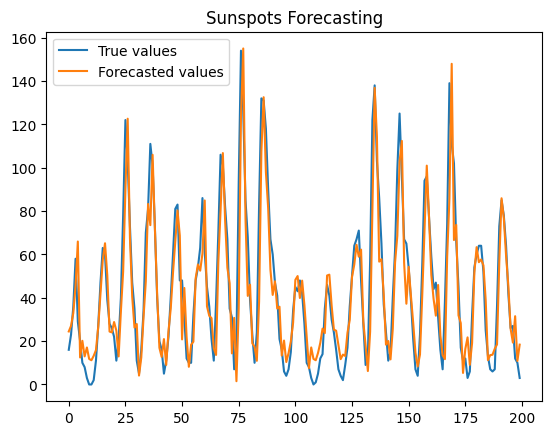

In [14]:
Tsu = model.predict(Pu)
plt.plot(Tu, label='True values')
plt.plot(Tsu, label='Forecasted values')
plt.title('Sunspots Forecasting')
plt.legend()
plt.show()

Number 11

4/4 [==============================] - 0s 2ms/step


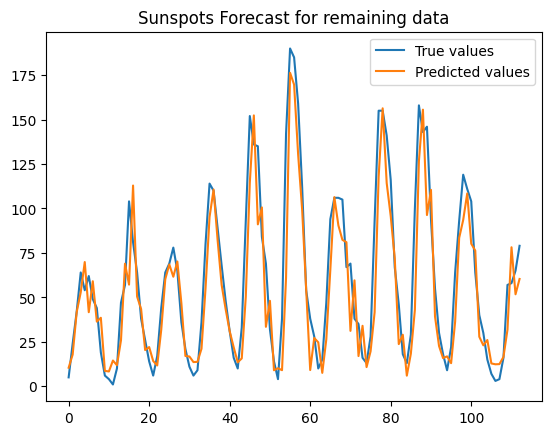

In [15]:
Tr = T[200:]
Pr = P[200:]
Ts = model.predict(Pr)
plt.plot(Tr, label='True values')
plt.plot(Ts, label='Predicted values')
plt.title('Sunspots Forecast for remaining data')
plt.legend()
plt.show()

Number 12

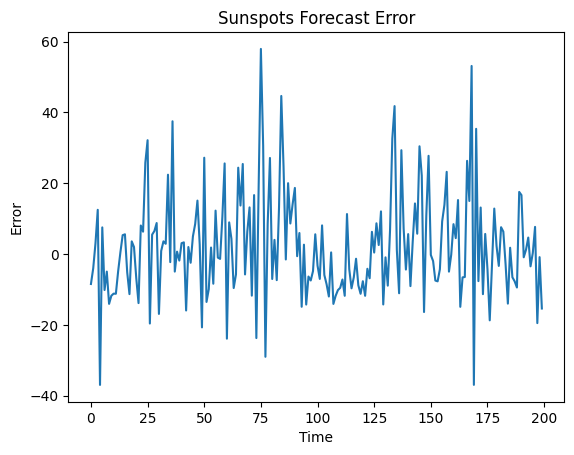

In [16]:
e = Tu - Tsu.reshape(-1)
plt.plot(e)
plt.title('Sunspots Forecast Error')
plt.xlabel('Time')
plt.ylabel('Error')
plt.show()

Number 13

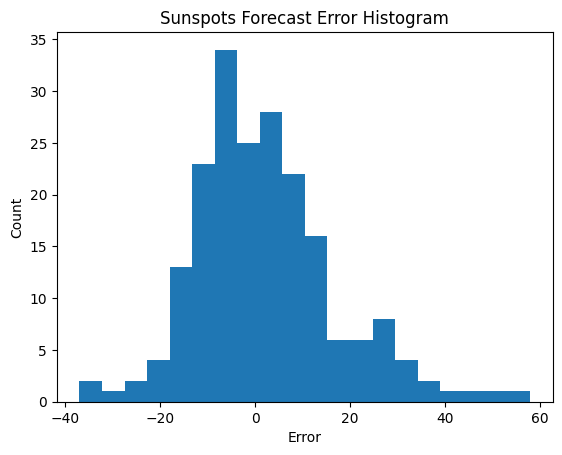

In [17]:
plt.hist(e, bins=20)
plt.title('Sunspots Forecast Error Histogram')
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()

Number 14

In [18]:
mse = tf.keras.losses.MeanSquaredError()
mad = tf.keras.losses.MeanAbsoluteError()
mse_value = mse(Tu, Tsu).numpy()
mad_value = mad(Tu, Tsu).numpy()
print(f'Mean-Square-Error (MSE): {mse_value}')
print(f'Mean Absolute Deviation (MAD): {mad_value}')

Mean-Square-Error (MSE): 2116.203857421875
Mean Absolute Deviation (MAD): 35.536102294921875


Number 15

In [19]:
model.save('Lab2_sunspots_checkpoint.h5')

Number 16

In [50]:
Ir = 0.1
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_shape=[2])])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(Ir))

Number 17

In [48]:
goal = 100
epochs = 1000
history = model.fit(Pu, Tu, epochs=epochs, verbose=0)

Number 18

In [49]:
mse_value = mse(Tu, Tsu).numpy()
print(f'Mean-Square-Error (MSE): {mse_value}')

Mean-Square-Error (MSE): 2116.203857421875


Number 19

In [51]:
model.save('Lab2_sunspots_checkpoint.h5')
model = tf.keras.models.load_model('Lab2_sunspots_checkpoint.h5')
mse_value = mse(Tu, Tsu).numpy()
print(f'Mean-Square-Error (MSE): {mse_value}\n')
print(f'New weight values of neural network: {model.get_weights()}')

Mean-Square-Error (MSE): 2116.203857421875

New weight values of neural network: [array([[-0.7813476],
       [ 0.8047446]], dtype=float32), array([0.], dtype=float32)]


Number 20

In [52]:
lr = 0.5
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_shape=[n])])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr))
history = model.fit(Pu, Tu, epochs=epochs, verbose=0)
mse_value = mse(Tu, Tsu).numpy()
print(f'Mean-Square-Error (MSE): {mse_value}')

Mean-Square-Error (MSE): 2116.203857421875


Number 21

4/4 [==============================] - 0s 2ms/step


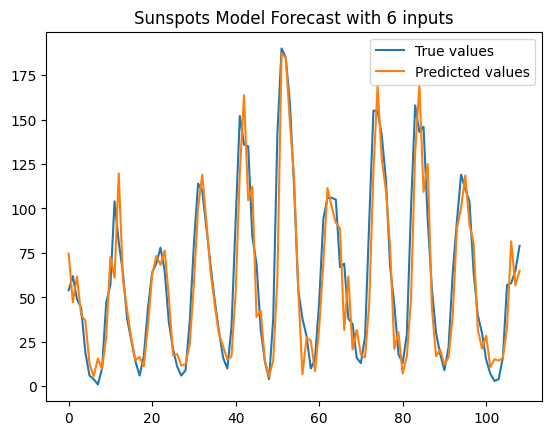

Mean-Square-Error (MSE): 377.9902038574219


In [53]:
n = 6

P = np.zeros((len(sunspots) - n, n))
T = np.zeros((len(sunspots) - n, 1))

for i in range(len(sunspots) - n):
    P[i] = sunspots[i:i+n]
    T[i] = sunspots[i+n]

Pu = P[:200]
Tu = T[:200]

Ir = 0.1
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_shape=[n])])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(Ir))
history = model.fit(Pu, Tu, epochs=epochs, verbose=0)
Tr = T[200:]
Pr = P[200:]
Tsr = model.predict(Pr)
plt.plot(Tr, label='True values')
plt.plot(Tsr, label='Predicted values')
plt.legend()
plt.title('Sunspots Model Forecast with 6 inputs')
plt.show()
mse_value = mse(T[200:], Tsr).numpy()
print(f'Mean-Square-Error (MSE): {mse_value}')

4/4 [==============================] - 0s 3ms/step


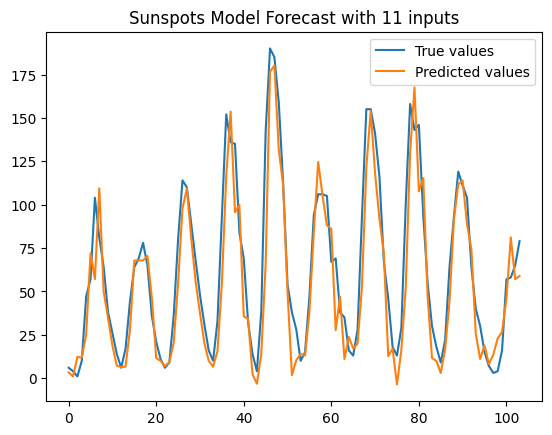

Mean-Square-Error (MSE): 388.2019348144531


In [45]:
n = 11
P = np.zeros((len(sunspots) - n, n))
T = np.zeros((len(sunspots) - n, 1))
for i in range(len(sunspots) - n):
    P[i] = sunspots[i:i+n]
    T[i] = sunspots[i+n]
Pu = P[:200]
Tu = T[:200]
Ir = 0.1
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_shape=[n])])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(Ir))
history = model.fit(Pu, Tu, epochs=epochs, verbose=0)
Tr = T[200:]
Pr = P[200:]
Tsr = model.predict(Pr)
plt.plot(Tr, label='True values')
plt.plot(Tsr, label='Predicted values')
plt.legend()
plt.title('Sunspots Model Forecast with 11 inputs')
plt.show()
mse_value = mse(T[200:], Tsr).numpy()
print(f'Mean-Square-Error (MSE): {mse_value}')